In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###  read csv file into data frame

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns

Index(['label', 'text', 'source'], dtype='object')

## column selections 

In [4]:
df = df[['label', 'text']]

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###  check total number of records for each label

In [8]:
df['label'].value_counts()

ham     5835
spam    1927
Name: label, dtype: int64

##  visualize it with count plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

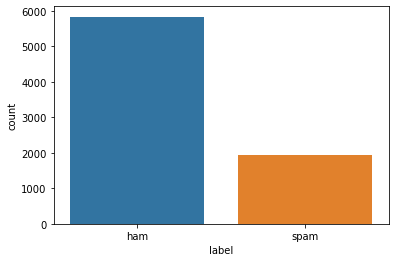

In [9]:
sn.countplot(df['label'])

###  removing biasing by took out same number of records for each label

In [10]:
spam = df[df['label']=='spam']
spam.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [11]:
ham = df[df['label']=='ham'].sample(len(spam))
ham.head()

,label,text
154,ham,As per your request 'Melle Melle (Oru Minnamin...
3557,ham,Ok lor. I'm in town now lei.
5600,ham,Super awesome video<br />﻿
6434,ham,OOOOO SHUFFLLLLLLLLLLLLLLLLLLLLLLINNNNN﻿
3259,ham,He fucking chickened out. He messaged me he wo...


###  verify that each label have same number of records 

In [12]:
assert len(ham)==len(spam)

###  Combine both dataframe into one final dataframe

In [15]:
df = pd.concat([ham,spam])

In [17]:
df['label'].value_counts()

spam    1927
ham     1927
Name: label, dtype: int64

### convert dataset into list 

In [18]:
texts = df['text'].tolist()
labels = df['label'].tolist()

In [19]:
labels_legend = {'ham': 0, 'spam': 1}
labels_legend_inverted = {f"{v}":k for k,v in labels_legend.items()}

In [20]:
labels_as_int =  [labels_legend[str(x)] for x in labels]

###  verify it using random 

In [21]:
import random
random_idx = random.randint(0, len(texts))
print('Random Index', random_idx)

assert texts[random_idx] == df.iloc[random_idx].text
assert labels[random_idx] == df.iloc[random_idx].label
assert labels_legend_inverted[str(labels_as_int[random_idx])] == labels[random_idx]

Random Index 2039


###  Create token for text 

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
MAX_NUM_WORDS=280
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6624 unique tokens.


###  assign padding to each record to make same size of input 

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 280

X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

###  convert label into one_hot encoding for training 

In [25]:
import numpy as np
from tensorflow.keras.utils import to_categorical

y = to_categorical(np.asarray(labels_as_int))

###  Create train and test data using sklearn

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###  Store this all required data and metadata at one place for later use 

In [27]:
import pickle

In [28]:
training_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'max_words': MAX_NUM_WORDS,
    'max_sequence': MAX_SEQUENCE_LENGTH,
    'legend': labels_legend,
    'labels_legend_inverted': labels_legend_inverted,
    "tokenizer": tokenizer,
}

In [29]:
with open('model_training_data', 'wb') as f:
    pickle.dump(training_data, f)

###  load that data and check it 

In [32]:
data = {}

with open('model_training_data', 'rb') as f:
    data = pickle.load(f)

In [33]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test', 'max_words', 'max_sequence', 'legend', 'labels_legend_inverted', 'tokenizer'])

#  All good for this file 